# Question 3: A Convolutional Neural Network Model for Credit  Card Fraud Detection

*  The Aim of this notebook is finding fraud in transaction based on CNN models of paper:

https://ieeexplore.ieee.org/document/9862930


* It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.  
*   The transactions are described by 30
features (V1, V2, . . ., V28, Time, and Amount) and then the
class label which denotes a fraudulent transaction as ”1” and a
normal transaction as ”0”

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data




In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import RobustScaler

import os
import seaborn as sns

import shutil
from google.colab import drive
from google.colab import files


## Part 3-1.
### 1. Histogram classes:


In [3]:
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip -q creditcardfraud.zip

Saving kaggle.json to kaggle.json
 86% 57.0M/66.0M [00:01<00:00, 47.3MB/s]
100% 66.0M/66.0M [00:01<00:00, 49.2MB/s]


In [6]:
df = pd.read_csv("./creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

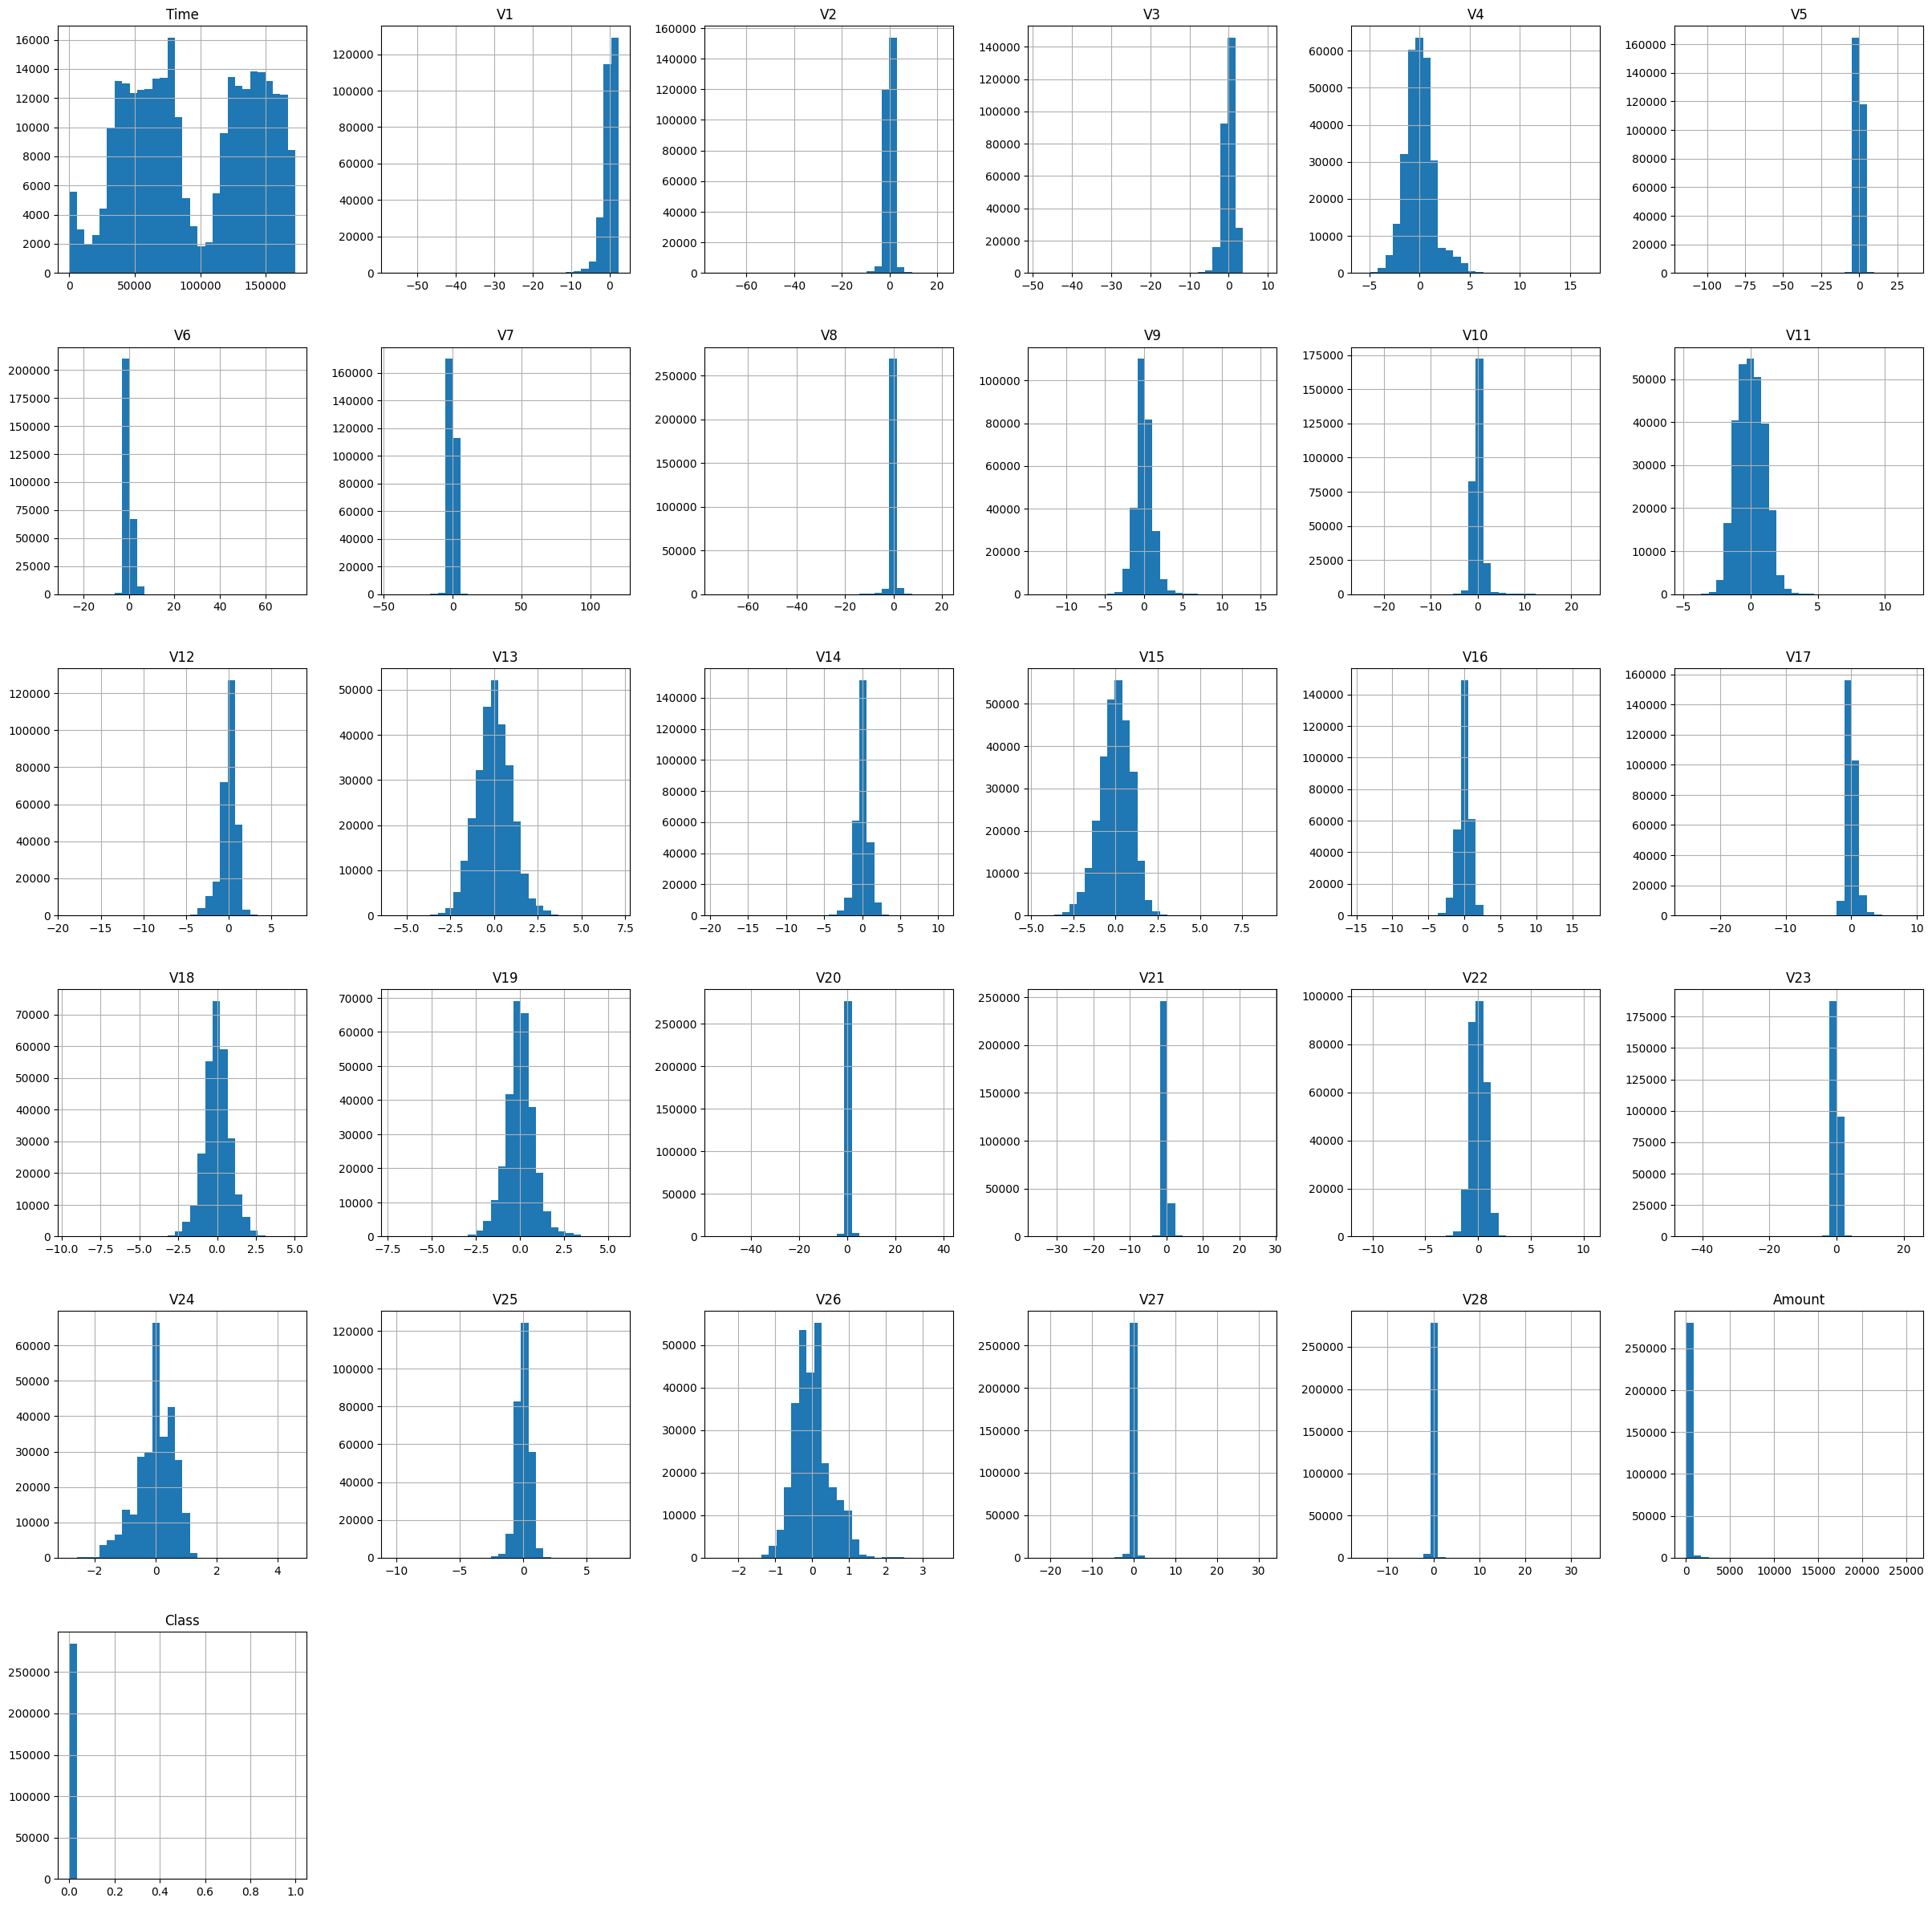

In [10]:
df.hist(bins=30,figsize=(30,30))

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2. Why we can't train model with data from the dataset?

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. So it's fragile and unbalance to train with this data. Almost anything will count as negative class.


Creating a training data set that will allow our algorithms to pick up the specific characteristics that make a transaction more or less likely to be fraudulent. Using the original data set would not prove to be a good idea for a very simple reason: Since over 99% of our transactions are non-fraudulent, an algorithm that always predicts that the transaction is non-fraudulent would achieve an accuracy higher than 99%. Nevertheless, that is the opposite of what we want. We do not want a 99% accuracy that is achieved by never labeling a transaction as fraudulent, we want to detect fraudulent transactions and label them as such.

## Paper's architecture

### Pre-processing dataset

In [18]:
new_df = df.copy()
time = new_df['Time']
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
new_df['Time'] = (time - time.min()) / (time.max() - time.min())

### train with unbalance data

In [50]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [51]:
X = df.drop('Class', axis=1)
y = df['Class']

X_unbalanced = X.values
y_unbalanced = y.values

In [52]:
X_unbalanced_reshaped = X_unbalanced.reshape(X_unbalanced.shape[0], X_unbalanced.shape[1], 1)

In [53]:
X_train, X_temp, y_train, y_temp = train_test_split(X_unbalanced_reshaped, y_unbalanced, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [55]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (170884, 30, 1)
Validation set shape: (56961, 30, 1)
Testing set shape: (56962, 30, 1)


In [54]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(rate=0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[Accuracy()])


model.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 14, 32)            0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 32)            0         
                                                                 
 conv1d_8 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_7 (Bat  (None, 13, 64)           

In [56]:
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/6
5341/5341 [==============================] - 45s 8ms/step - loss: 0.0183 - accuracy: 0.0000e+00 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 2/6
5341/5341 [==============================] - 38s 7ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 1.7556e-05
Epoch 3/6
5341/5341 [==============================] - 38s 7ms/step - loss: 0.0066 - accuracy: 5.8519e-06 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 4/6
5341/5341 [==============================] - 38s 7ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 5/6
5341/5341 [==============================] - 38s 7ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 6/6
5341/5341 [==============================] - 38s 7ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00


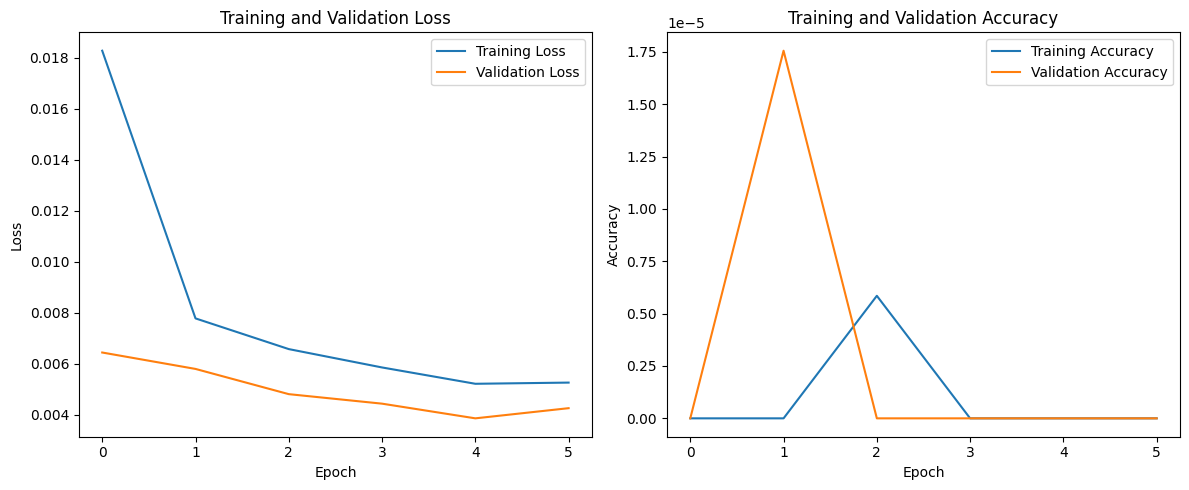

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1781/1781 [==============================] - 5s 2ms/step


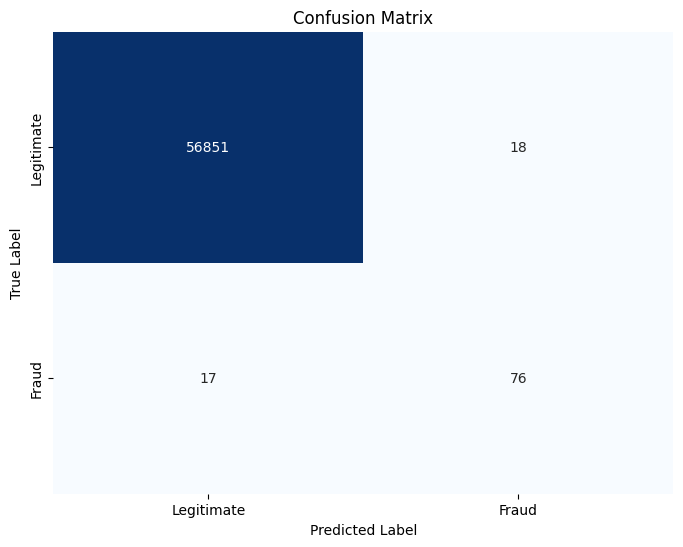

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56869
       Fraud       0.81      0.82      0.81        93

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain model predictions for the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Calculate and plot the confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Report precision, recall, and F1 score
report = classification_report(y_test, y_pred_binary, target_names=['Legitimate', 'Fraud'])
print("Classification Report:")
print(report)


### 3.3 Sampling - Adaptive Synthetic Sampling (ADASYN)

ADASYN adaptively generates different number of samples
based on an estimate of the local distribution of the class to be
oversampled; in this case, the minority class. Using default
values for the parameters of the ADASYN sampling technique,
the fraudulent class was oversampled to a size (284,298
samples) comparable to the normal class. Thereafter, the
complete dataset which consists of a total of 568,613 data points
was partitioned into three parts; 60% training data, 20%
validation data, and 20% testing data.

Using the train test split method, the dataset was first divided
into random training (80%) and testing (20%) datasets, and
subsequently, 25% of the training dataset was taken as the
validation dataset which is equivalent to 20% of the total
dataset.

**Method Explanation** :


*   Separation of Data:

The dataset is separated into features (X) and the target variable (y), where y represents the binary class labels (0 for legitimate transactions, 1 for frauds).

*   Identification of Indices:

The indices of fraud and legitimate samples are identified in the dataset.


*   Imbalance Ratio:

The imbalance ratio is calculated, representing the ratio of legitimate samples to fraud samples in the original dataset.

*   Synthetic Data Generation:
For each fraud sample, the algorithm identifies its k nearest neighbors among legitimate samples.
It then generates synthetic samples by interpolating between the fraud sample and randomly selected neighbors.
The number of synthetic samples generated for each fraud sample is based on the imbalance ratio.


*   Combination of Data:

The synthetic samples are combined with the original dataset.

*   Output
The final balanced dataset is obtained with an updated distribution of samples.



**Advantages**


1.   Adaptive to Data Distribution:

DASYN is adaptive and takes into account the local density of the data, generating more synthetic samples in regions of the feature space where the minority class is less represented.

2.   Avoiding Overfitting:

By introducing synthetic samples only where necessary, ADASYN helps avoid overfitting that might occur if synthetic samples were added uniformly.

3.   No Need for Retraining:
Unlike some other methods, ADASYN does not require retraining of the model after oversampling, making it computationally efficient.




**Disadvantages**



1.   Sensitivity to Parameters

ADASYN's performance can be sensitive to parameters such as the number of nearest neighbors (k). The choice of k influences the quality of synthetic samples.

2.   Potential for Noise

he algorithm may introduce noise into the dataset if the nearest neighbors are not well-selected or if the dataset has outliers.

3.   Computational Complexity

While ADASYN is computationally efficient compared to some other methods, it still involves finding nearest neighbors for each minority sample, which can be computationally demanding for large datasets.

4.   Limited to Binary Classification

ADASYN is designed for binary classification problems and may need adaptation for multiclass scenarios.


In [23]:
# Separate the dataset into features (X) and the target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Identify the indices of fraud and legitimate samples
fraud_indices = np.where(y == 1)[0]
legitimate_indices = np.where(y == 0)[0]

# Calculate the imbalance ratio
imbalance_ratio = len(legitimate_indices) / len(fraud_indices)

# Initialize variables for the synthetic data
synthetic_features = []
synthetic_labels = []

# Loop over each fraud sample and generate synthetic samples
for fraud_index in fraud_indices:
    # Find the k nearest neighbors of the fraud sample
    k_neighbors = np.argsort(np.linalg.norm(X.values[legitimate_indices] - X.values[fraud_index], axis=1))[:5]

    # Calculate the number of synthetic samples to generate for the current fraud sample
    num_synthetic_samples = int(imbalance_ratio) - 1

    #  Generate synthetic samples
    for _ in range(num_synthetic_samples):
        random_neighbor_index = np.random.choice(k_neighbors)
        synthetic_sample = X.values[fraud_index] + np.random.rand() * (X.values[random_neighbor_index] - X.values[fraud_index])
        synthetic_features.append(synthetic_sample)
        synthetic_labels.append(1)  # Label for fraud sample

In [25]:
#  Combine the synthetic samples with the original dataset
X_balanced = np.vstack((X.values, np.array(synthetic_features)))
y_balanced = np.concatenate((y.values, np.array(synthetic_labels)))

In [26]:
# Print the dataset distribution before and after balancing
print("TABLE I. DATASET DISTRIBUTION")
print("Dataset \t Legitimate \t Fraud \t\t Total")
print("Before Balancing \t {} \t\t {} \t\t {}".format(len(legitimate_indices), len(fraud_indices), len(y)))
print("After Balancing \t {} \t\t {} \t\t {}".format(len(np.where(y_balanced == 0)[0]), len(np.where(y_balanced == 1)[0]), len(y_balanced)))

TABLE I. DATASET DISTRIBUTION
Dataset 	 Legitimate 	 Fraud 		 Total
Before Balancing 	 284315 		 492 		 284807
After Balancing 	 284315 		 283884 		 568199


### Explain whether sampling should be done before dividing the data into training and test data be or after that?

both answers are valid and the answer is dependent on the goal.


1.    Sampling Before Splitting:

You ensure that the training set is representative of the overall data distribution. This is important because the model learns from the training set, and if it is not representative, the model's performance on the test set may not generalize well to new, unseen data.

The test set remains untouched and reflects the true distribution of the original data, providing a more realistic assessment of the model's performance.

2.   Sampling After Splitting:

This approach mimics a more realistic scenario where the model is exposed to imbalanced data during training and must generalize to unseen, imbalanced data during testing.

It provides a cleaner evaluation of the model's ability to generalize to new data, as the test set remains representative of the true distribution of the original data.



In [27]:
df_balanced = pd.DataFrame(data=np.column_stack((X_balanced, y_balanced)), columns=df.columns)


In [30]:
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0.0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0.0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0.0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568194,170017.611065,-0.530889,-0.678066,-0.390866,0.603313,1.536260,-1.393646,1.016169,-0.748491,0.345123,...,-0.095268,0.347132,0.227499,-0.021848,-0.333625,0.330569,-0.466478,-0.143342,0.382010,1.0
568195,170221.366078,1.902616,-0.535389,-2.038249,0.007849,0.332912,-0.191568,-0.104756,-0.095748,0.460012,...,0.040540,0.059401,-0.105893,-0.531437,0.146482,-0.211323,-0.012416,-0.014741,1.353843,1.0
568196,170340.375776,1.990478,0.153650,-2.531877,0.422419,1.120591,-0.093623,0.206838,-0.065241,0.574438,...,-0.159790,-0.283657,-0.065065,-0.449757,0.299272,-0.301366,0.004373,-0.015663,0.276588,1.0
568197,170336.270451,1.864554,0.242228,-2.577076,0.432206,1.120200,-0.118716,0.215445,-0.022114,0.524914,...,-0.151210,-0.276570,-0.072426,-0.420458,0.306319,-0.294512,-0.015943,-0.014310,0.273133,1.0


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

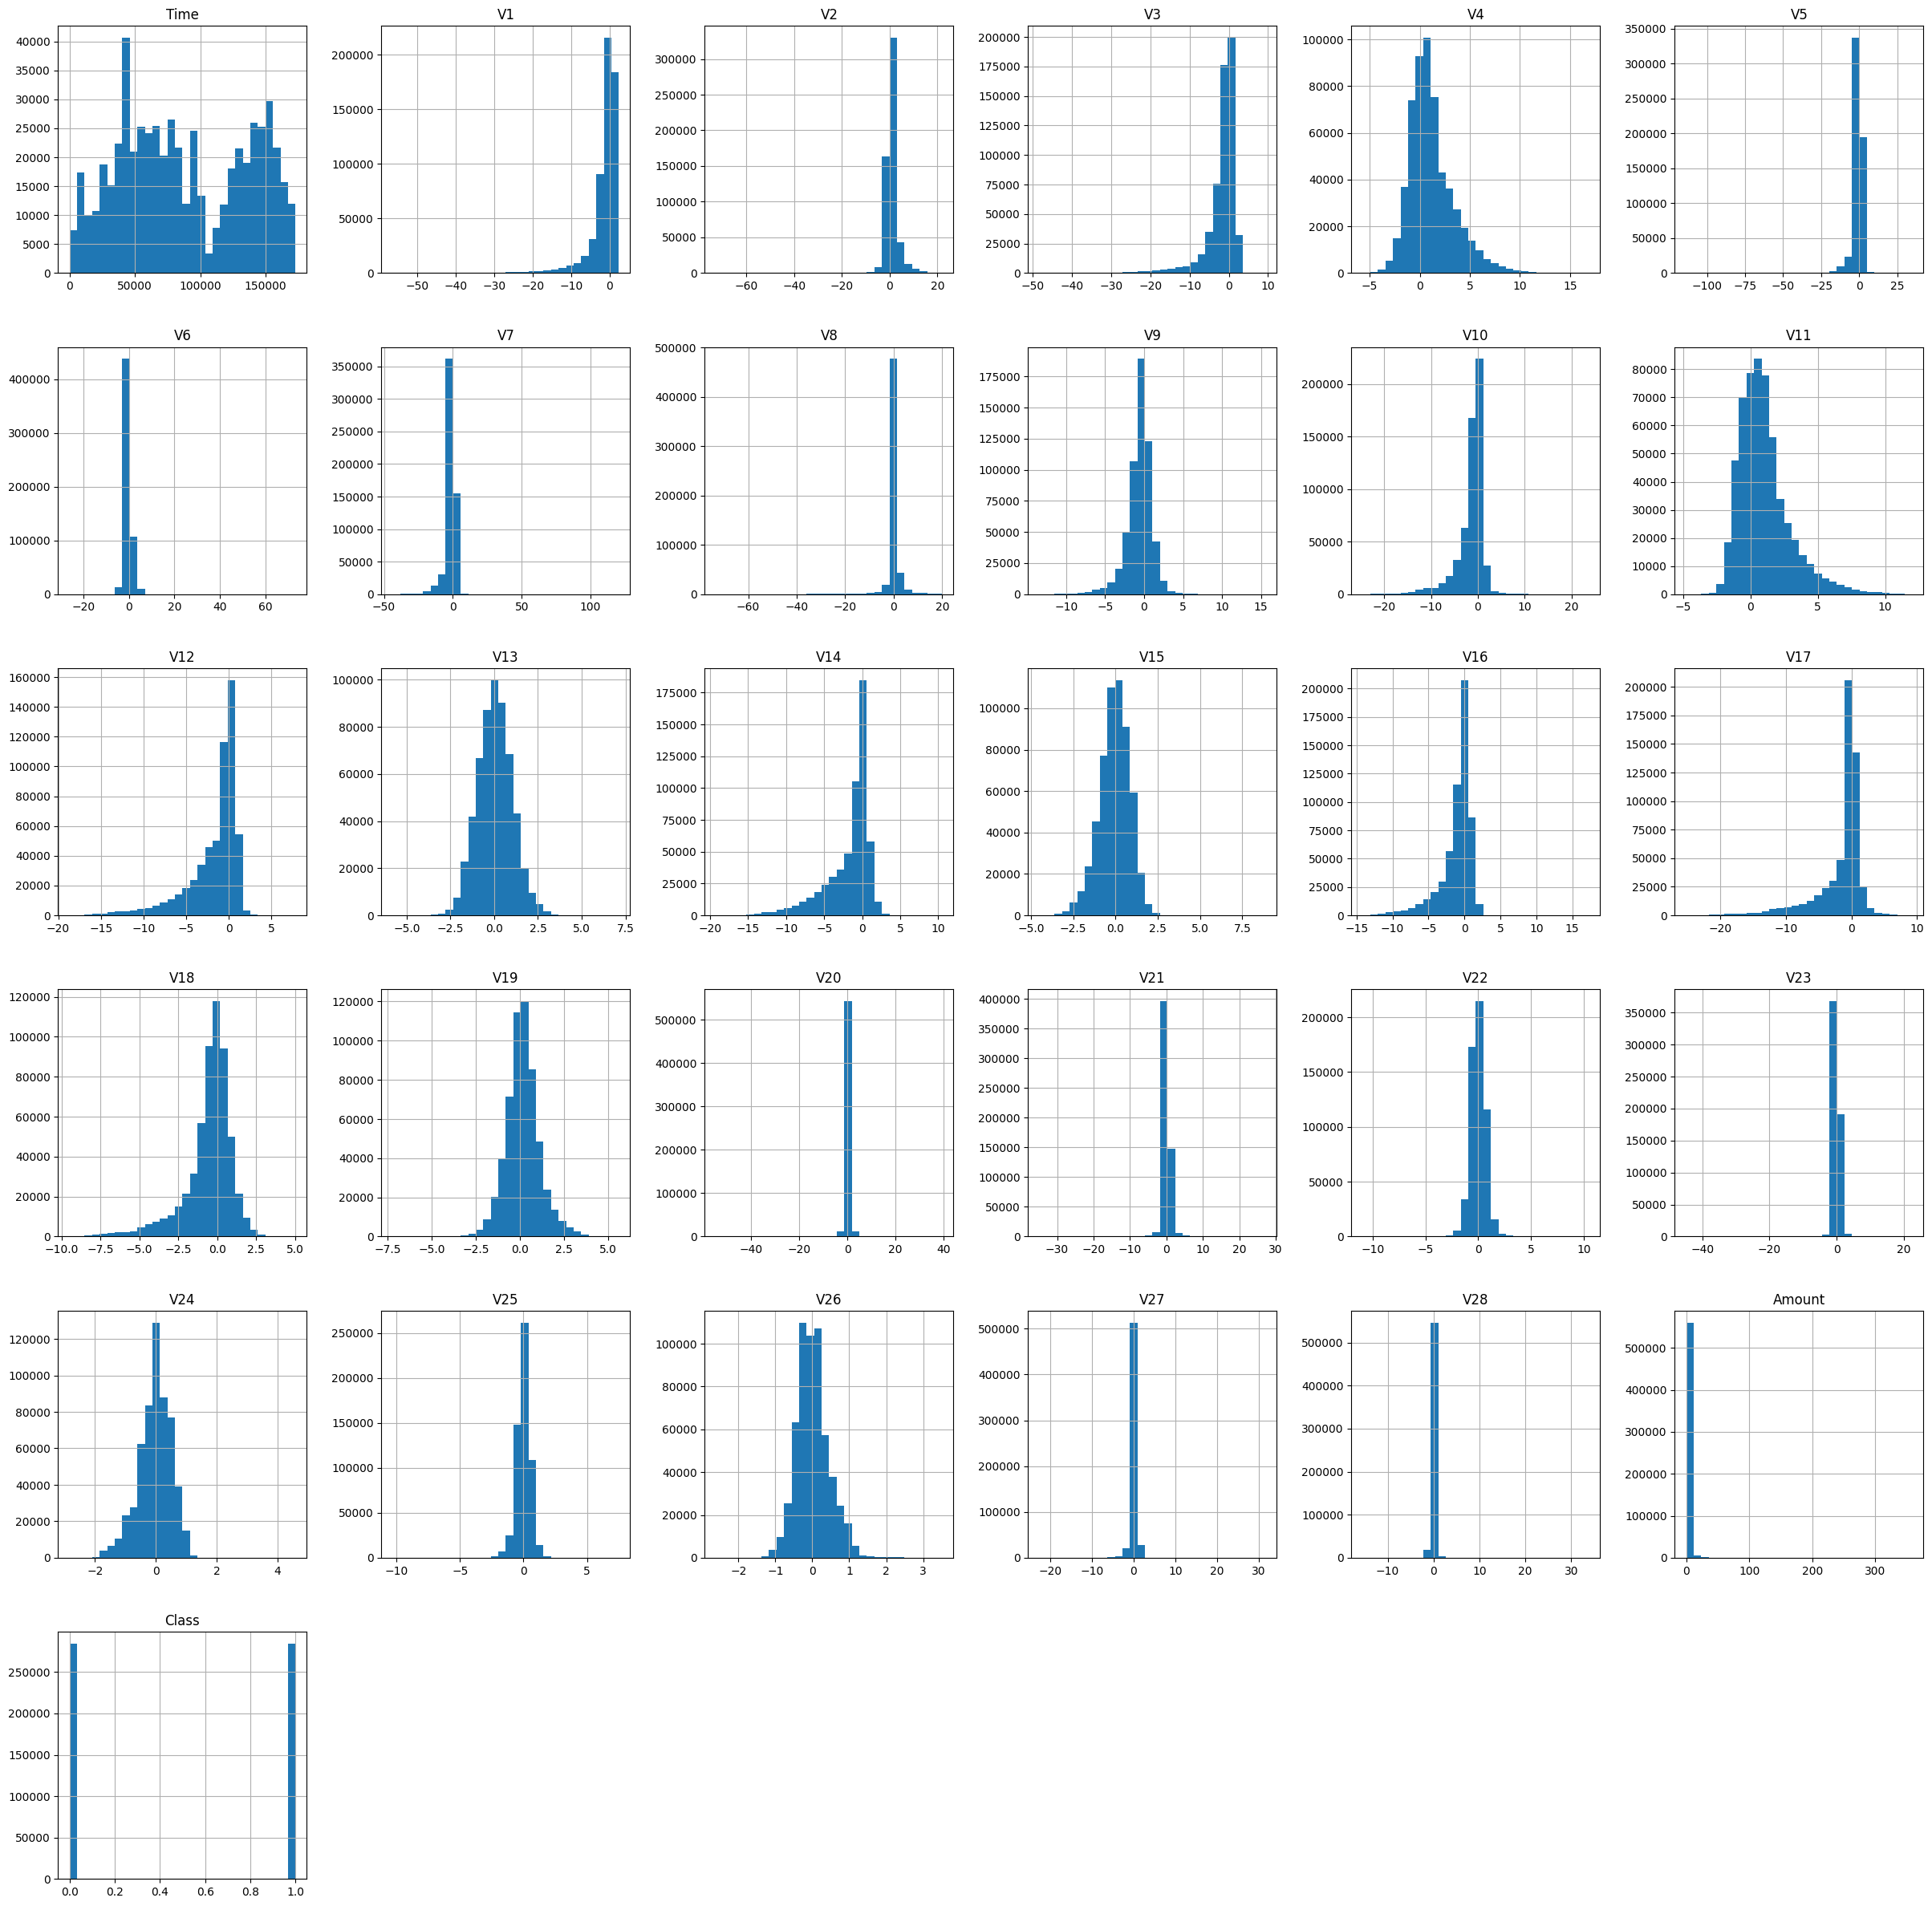

In [29]:
df_balanced.hist(bins=30,figsize=(30,30))

### Sampling and partition  (partitioned into three parts; 60% training data, 20% validation data, and 20% testing data)

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_balanced_reshaped = X_balanced.reshape(X_balanced.shape[0], X_balanced.shape[1], 1)

In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced_reshaped, y_balanced, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [34]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (340919, 30, 1)
Validation set shape: (113640, 30, 1)
Testing set shape: (113640, 30, 1)


## 3-4. Train model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [44]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(rate=0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[Accuracy()])


model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 14, 32)            0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 32)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_5 (Bat  (None, 13, 64)           

In [46]:
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/6
10654/10654 [==============================] - 81s 8ms/step - loss: 0.3358 - accuracy: 0.0755 - val_loss: 0.2760 - val_accuracy: 0.1125
Epoch 2/6
10654/10654 [==============================] - 80s 7ms/step - loss: 0.2994 - accuracy: 0.1120 - val_loss: 0.2601 - val_accuracy: 0.1262
Epoch 3/6
10654/10654 [==============================] - 78s 7ms/step - loss: 0.2838 - accuracy: 0.1293 - val_loss: 0.2501 - val_accuracy: 0.1406
Epoch 4/6
10654/10654 [==============================] - 79s 7ms/step - loss: 0.2754 - accuracy: 0.1300 - val_loss: 0.2392 - val_accuracy: 0.1291
Epoch 5/6
10654/10654 [==============================] - 76s 7ms/step - loss: 0.2655 - accuracy: 0.1377 - val_loss: 0.2376 - val_accuracy: 0.1198
Epoch 6/6
10654/10654 [==============================] - 80s 7ms/step - loss: 0.2613 - accuracy: 0.1306 - val_loss: 0.2397 - val_accuracy: 0.0905


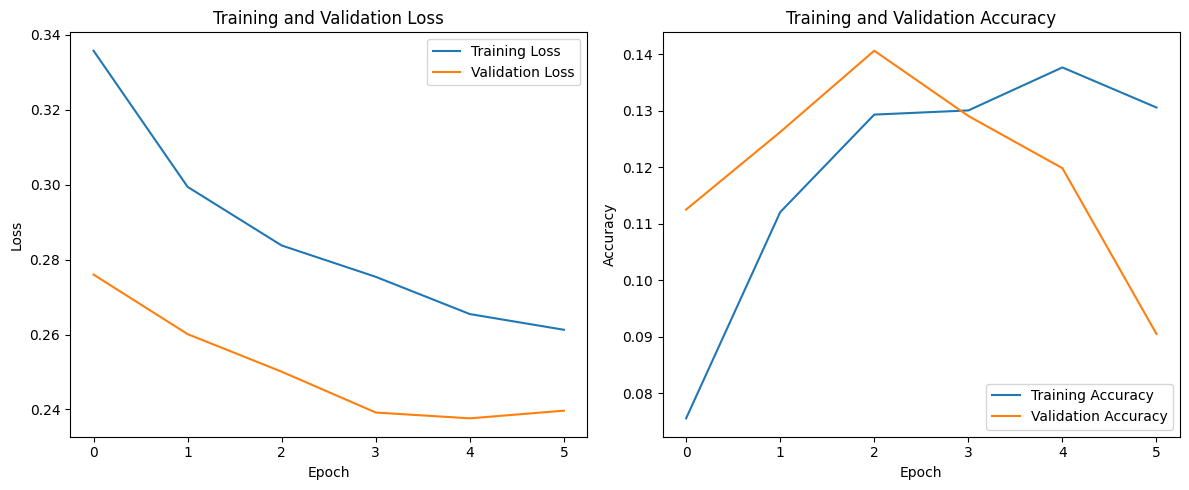

In [47]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

3552/3552 [==============================] - 8s 2ms/step


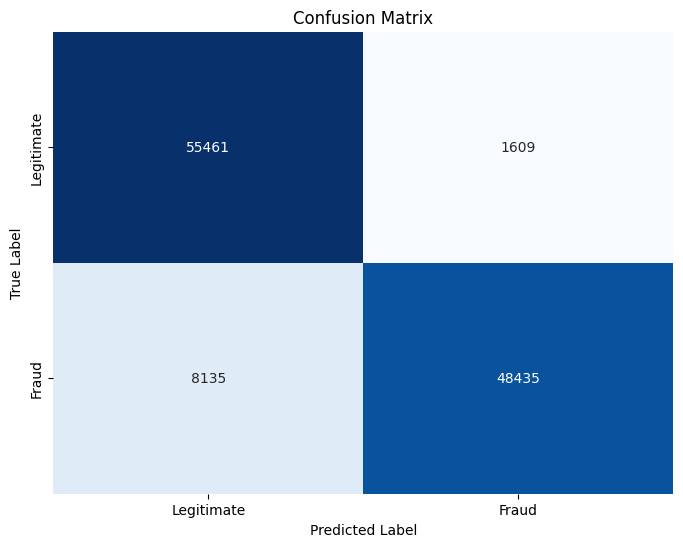

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.87      0.97      0.92     57070
       Fraud       0.97      0.86      0.91     56570

    accuracy                           0.91    113640
   macro avg       0.92      0.91      0.91    113640
weighted avg       0.92      0.91      0.91    113640



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain model predictions for the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Calculate and plot the confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Report precision, recall, and F1 score
report = classification_report(y_test, y_pred_binary, target_names=['Legitimate', 'Fraud'])
print("Classification Report:")
print(report)
